## Dehli Indian Housing Part 2 Predicting Price with Size using Linear Regression by Dumisani Maxwell Mukuchura

#### Dataset Source: *https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price*

##### Contact: dumisanimukuchura@gmail.com | LinkedIn: https://www.linkedin.com/in/dumisani-maxwell-mukuchura-4859b7170/

##### This Project will explore the Dehli Indian Housing and build a model predicting rental price from size. 

##### As seen from Part one Rental Price has a positive correlation of approx. 0.57 with House Size

## Prepare Data

### 1. Molule, Library and Data Imports

In [18]:
#Import Standard Modules and Libraries to use

import os #For file and directory operations

#Data Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt

#Model Related Libraries: Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

### Defining file path and import 'Dehli-Indian-Housing-Clean-Data.csv' from EDA Project

In [19]:
#Defining file path and import 'Dehli-Indian-Housing-Clean-Data.csv'
# Get the current working directory
current_dir = os.getcwd()

# Trim to one level above
base_dir = os.path.dirname(current_dir)

# Construct the path to the data folder
data_dir = os.path.join(base_dir, "data")

# Construct the full path to the CSV file
csv_file_path = os.path.join(data_dir, "Dehli-Indian-Housing-Clean-Data.csv")

In [26]:
# Wrangle function to automate the Data Importing and any Additional Cleaning

def wrangle(csv_file_path):

    # Read the CSV file into a DataFrame
    housing_data = pd.read_csv(csv_file_path)

    #Make a Copy and Maintain the original dataset as is 
    housing_df = housing_data.copy()

    #Subset with "house_size_in_sqft" between 0.25 and 0.75 quartiles
    low, high = housing_df["house_size_in_sqft"].quantile([0.25, 0.75])
    mask_area = housing_df["house_size_in_sqft"].between(low, high)

    housing_df = housing_df[mask_area]

    return housing_df

In [27]:
#Using Wrangle funtion to create the housing_df DataFrame

housing_df = wrangle(csv_file_path)

#Check if the import was successful with a shape check
print("df shape:", housing_df.shape)

#Check if the import was successful with a head() check
housing_df.head()

df shape: (1177, 19)


,house_type,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,numBedroom,house_layout,house_size_in_sqft,price_approx_usd
2,Villa,Tuglak Road,Delhi,28.595453,77.210335,2010105,INR,4.0,2.0,Not Negotiable,4.21,Posted a year ago,Its four bhk villa in the super location of de...,"60,10,155",Unfurnished,4,BHK,5562.0,23438.72
5,Independent Floor,Saket,Delhi,28.523548,77.200142,235595,INR,3.0,2.0,Not Negotiable,0.96,Posted a year ago,Its three bhk builder floor in the super locat...,"7,54,225",Unfurnished,3,BHK,2856.0,2747.14
7,Independent Floor,Saket,Delhi,28.523548,77.200142,301012,INR,3.0,2.0,Not Negotiable,1.23,Posted a year ago,Well designed 3 bhk builder floor is available...,"10,11,001",Unfurnished,3,BHK,2856.0,3509.93
8,Independent Floor,Saket,Delhi,28.523548,77.200142,301012,INR,3.0,2.0,Not Negotiable,1.23,Posted a year ago,Its three bhk builder floor in the super locat...,"10,10,202",Unfurnished,3,BHK,2856.0,3509.93
11,Independent Floor,Maharani Bagh,Delhi,28.572620,77.264221,401015,INR,4.0,2.0,Not Negotiable,0.79,Posted a year ago,Its four bhk builder floor in the super locati...,"12,02,002",Unfurnished,4,BHK,5896.0,4676.01


In [22]:
# Checking DataFrame Details

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   house_type          2171 non-null   object 
 1   location            2171 non-null   object 
 2   city                2171 non-null   object 
 3   latitude            2171 non-null   float64
 4   longitude           2171 non-null   float64
 5   price               2171 non-null   int64  
 6   currency            2171 non-null   object 
 7   numBathrooms        2171 non-null   float64
 8   numBalconies        2171 non-null   float64
 9   isNegotiable        2171 non-null   object 
 10  priceSqFt           2171 non-null   float64
 11  verificationDate    2171 non-null   object 
 12  description         2171 non-null   object 
 13  SecurityDeposit     2171 non-null   object 
 14  Status              2171 non-null   object 
 15  numBedroom          2171 non-null   int64  
 16  house_

## Explore

###  2. Further Analysis into the Two key Columns we shall need "house_size_in_sqft" and "price_approx_usd".

- We saw in the previous project that property size is an important factor in determining price. With that in mind, let's look at the distribution of property sizes in our dataset.

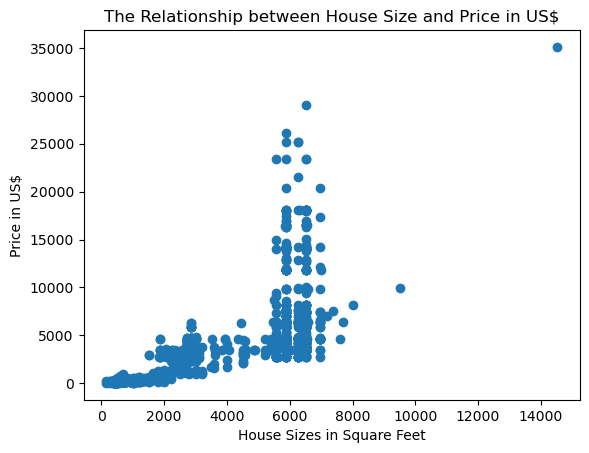

In [11]:
# Scatter Plot of "house_size_in_sqft" and "price_approx_usd".

plt.scatter (x=housing_df["house_size_in_sqft"], y=housing_df["price_approx_usd"])
plt.xlabel("House Sizes in Square Feet")
plt.ylabel("Price in US$")
plt.title("The Relationship between House Size and Price in US$")

plt.show();

- From the relationship, we can notice a positive correlation, but we also have Outliers that need to be explored.

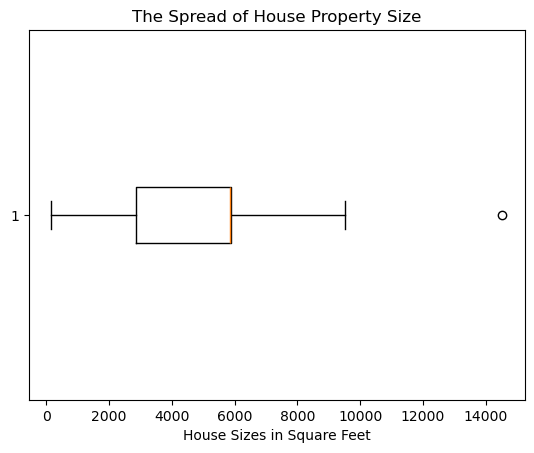

In [23]:
# Box Plot of the Relationsing between Property Size and Property Price: "house_size_in_sqft" and "price_approx_usd".

plt.boxplot(housing_df["house_size_in_sqft"], vert=False)
plt.xlabel("House Sizes in Square Feet")
plt.title("The Spread of House Property Size")

plt.show();

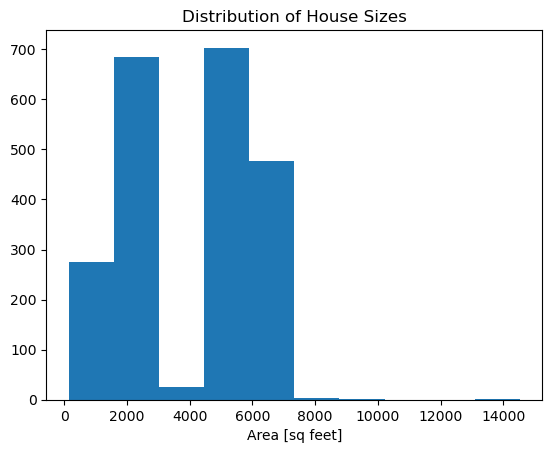

In [13]:
# Histogram to understand the spread of House Sizes

plt.hist(housing_df["house_size_in_sqft"])
plt.xlabel("Area [sq feet]")
plt.title("Distribution of House Sizes")

plt.show();

In [10]:
# Get Statistical Description of the "house_size_in_sqft"

housing_df["house_size_in_sqft"].describe()

count     2171.000000
mean      4347.608936
std       2063.935942
min        150.000000
25%       2856.000000
50%       5852.000000
75%       5896.000000
max      14521.000000
Name: house_size_in_sqft, dtype: float64

- The statistics above confirm what we suspected. While most of the properties in our dataset are between 2856 sqm and 5896 sqm we have others as lower as 150 sqm and others as big 14521 sqm and he best way is to identify those outliers and remove them. We can do this by utilizing the Inter Quartile Range and updating our Wrangle Function and removing them.